In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Assignments\A_13_KNN

14-07-2022  18:19    <DIR>          .
14-07-2022  18:19    <DIR>          ..
14-07-2022  18:13    <DIR>          .ipynb_checkpoints
14-07-2022  18:19             1,372 asignment13_KNN.ipynb
14-07-2022  08:41            10,053 glass.csv
14-07-2022  08:41               550 problem_statement(Glass).txt
14-07-2022  08:42                62 Problem_Statement(Zoo).txt
14-07-2022  08:41             4,600 Zoo.csv
               5 File(s)         16,637 bytes
               3 Dir(s)  119,360,401,408 bytes free


# Zoo data

Implement a KNN model to classify the animals in to categorie

In [3]:
df1=pd.read_csv("Zoo.csv")

In [4]:
df1

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
df1.type.value_counts()    # There are 7 types of animals present in this data

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [6]:
# Dropping the animal name column because it is not needed
df1.drop(columns='animal name',inplace=True)

In [7]:
df1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
df1.isna().sum()    # There are no null values 

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


Text(0, 0.5, 'Value Count')

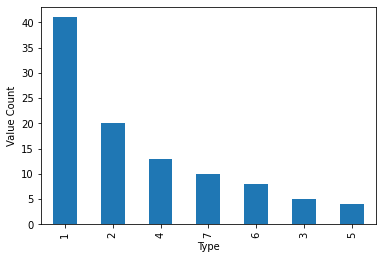

In [72]:
df1['type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Value Count')

We can see that majority of animals are coming from "category 1"

In [8]:
# There are total 16 features
# There is no need for scaling the data because the data is categorical
# The Target variable "type" is a categorical data, hence we will use KNN Classifier

In [19]:
# Splitting the features and target variable
x=df1.iloc[:,:-1]
y=df1.iloc[:,16:]

In [34]:
# Scaling the features
x=(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


In [35]:
y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [36]:
# Splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [37]:
x_test.shape

(31, 16)

In [38]:
y_test.shape

(31, 1)

In [39]:
# Optimal value of "k"

k_range=range(1,40,2)
score=[]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_test_pred=knn.predict(x_test)
    score.append(accuracy_score(y_test,y_test_pred))

In [60]:
score

[0.9354838709677419,
 0.967741935483871,
 0.967741935483871,
 0.9354838709677419,
 0.9354838709677419,
 0.9032258064516129,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8064516129032258,
 0.7096774193548387,
 0.7096774193548387,
 0.7096774193548387,
 0.7096774193548387,
 0.7096774193548387,
 0.7096774193548387,
 0.6774193548387096,
 0.6129032258064516,
 0.5483870967741935,
 0.5483870967741935]

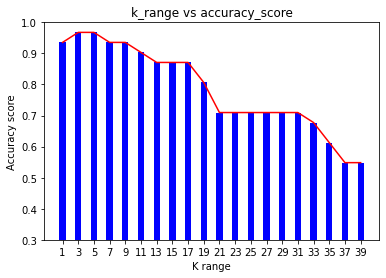

In [40]:
# Plotting for better understanding

plt.bar(k_range,score,color='blue')
plt.plot(k_range,score,color='red')
plt.xticks(k_range)
plt.ylim(0.3,1)
plt.title('k_range vs accuracy_score')
plt.xlabel('K range')
plt.ylabel('Accuracy score')
plt.show()

From the plot it is clear that k=3 or k=5 are optimal number of neighbors.

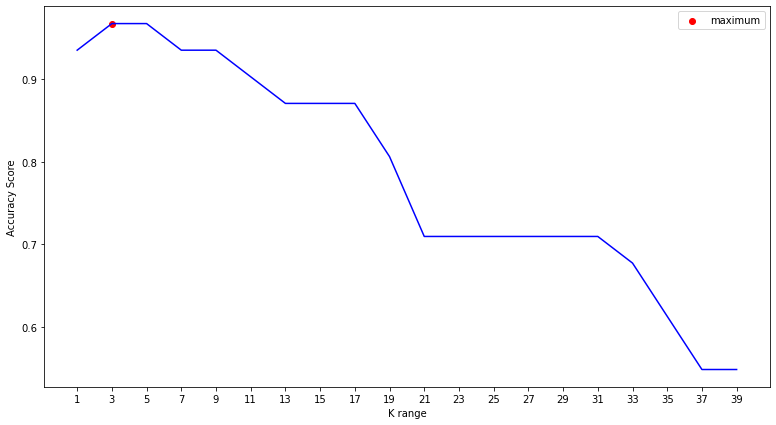

In [59]:
# Graphical Representation
max_x=np.argmax(score)+2
max_y=np.max(score)
plt.figure(figsize=(13,7))
plt.plot(k_range,score,color='blue')
plt.scatter(max_x,max_y,color='red',label='maximum')
plt.xlabel('K range')
plt.ylabel('Accuracy Score')
plt.xticks(k_range)
plt.legend()
plt.show()

In [102]:
# Applying model for k=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [103]:
# Accuracy for testing data
y_test_pred=knn.predict(x_test)
accuracy_score(y_test,y_test_pred)

0.967741935483871

# Glass data

Problem Statement: Prepare a model for glass classification using KNN
Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)

1 --> building_windows_float_processed 

2 --> building_windows_non_float_processed

3 --> vehicle_windows_float_processed

4 --> vehicle_windows_non_float_processed (none in this database)

5 --> containers

6 --> tableware

7 --> headlamps


In [63]:
glass=pd.read_csv("glass.csv")

In [64]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [65]:
glass.shape

(214, 10)

In [66]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [67]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [69]:
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

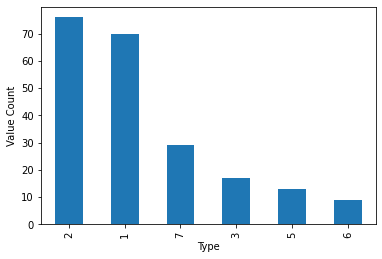

In [74]:
glass['Type'].value_counts().plot(kind='bar');
plt.xlabel('Type');
plt.ylabel('Value Count');

We can see from the bar plot that majority of data is coming from "type 1"

In [83]:
# Splitting the features and target variable
X=glass.iloc[:,:-1]
Y=glass.iloc[:,-1]

In [84]:
# Scaling the features
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [85]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [86]:
# Splitting the data into Training and Testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=6)

In [87]:
X_train.shape

(149, 9)

In [88]:
Y_train.shape

(149,)

In [89]:
# Optimal value of k

K_Range=range(1,40,2)
acc_score=[]
for i in K_Range:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    Y_test_pred=model.predict(X_test)
    acc_score.append(accuracy_score(Y_test,Y_test_pred))

In [90]:
acc_score

[0.6461538461538462,
 0.6,
 0.5692307692307692,
 0.5538461538461539,
 0.5538461538461539,
 0.5538461538461539,
 0.5692307692307692,
 0.5692307692307692,
 0.6,
 0.6307692307692307,
 0.6461538461538462,
 0.5846153846153846,
 0.6307692307692307,
 0.6,
 0.6,
 0.5846153846153846,
 0.5846153846153846,
 0.5846153846153846,
 0.5692307692307692,
 0.5538461538461539]

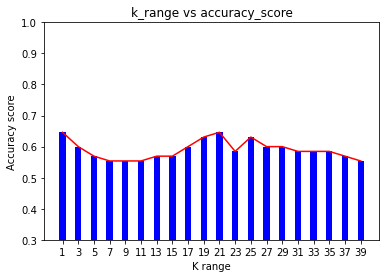

In [91]:
# Plotting for better understanding

plt.bar(K_Range,acc_score,color='blue')
plt.plot(K_Range,acc_score,color='red')
plt.xticks(K_Range)
plt.ylim(0.3,1)
plt.title('k_range vs accuracy_score')
plt.xlabel('K range')
plt.ylabel('Accuracy score')
plt.show()

In [92]:
# Maximum Accuracy
np.max(acc_score)

0.6461538461538462

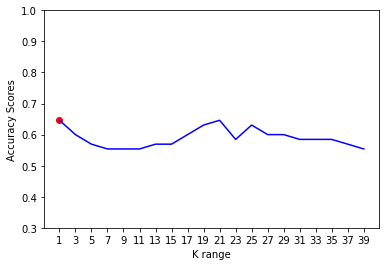

In [96]:
# Graphical Representation
max_x=np.argmax(acc_score)+1
max_y=np.max(acc_score)
plt.plot(K_Range,acc_score,color='blue')
plt.scatter(max_x,max_y,color='red',label='maximum')
plt.xlabel('K range')
plt.ylabel('Accuracy Scores')
plt.ylim(0.3,1)
plt.xticks(K_Range)
plt.show()

From both the plots the maximum accuracy is for k=1 and k=21, hence both are optimal values for "k".

In [105]:
# Applying model for k=21
knn_model=KNeighborsClassifier(n_neighbors=21)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=21)

In [106]:
# Accuracy for testing data
Y_test_pred=knn_model.predict(X_test)
accuracy_score(Y_test,Y_test_pred)

0.6461538461538462